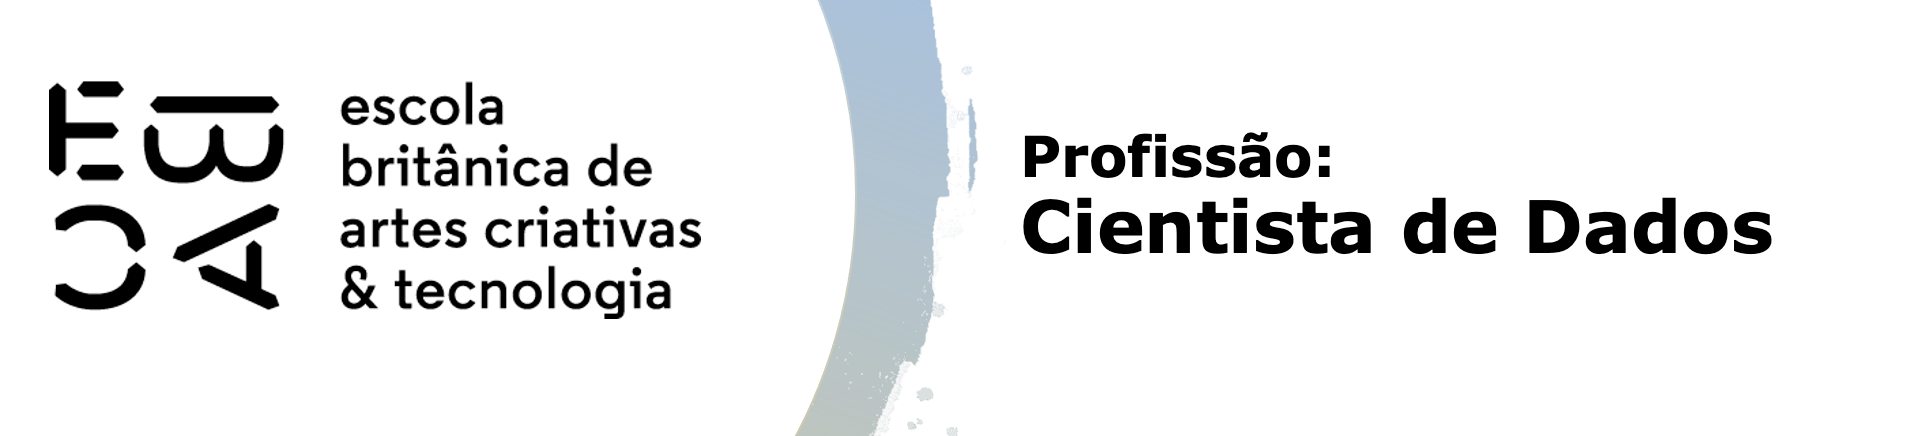

# Tarefa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
pg = sns.load_dataset('penguins')

In [3]:
pg.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
pg = pg.dropna(subset=['sex', 'body_mass_g'])

In [5]:
pg.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


Text(0, 0.5, '')

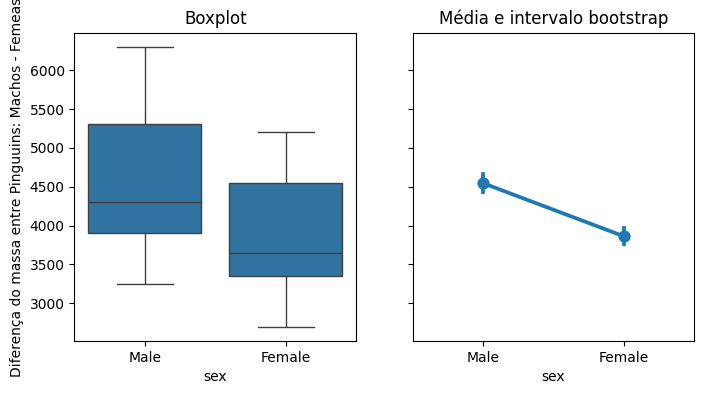

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), sharey=True)
sns.boxplot(data=pg, y='body_mass_g', x='sex', ax=ax[0])
ax[0].set_title('Boxplot')
# ax[0].set_ylim((-4, 0))
# ax[1].set_ylim((-4, 0))
ax[0].set_ylabel('Diferença do massa entre Pinguuins: Machos - Femeas')

sns.pointplot(data=pg, x='sex', y = 'body_mass_g')
ax[1].set_title('Média e intervalo bootstrap')
ax[1].set_ylabel('')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [8]:
# Separar os dados entre machos e fêmeas
male_pg = pg[pg['sex'] == 'Male']['body_mass_g']
female_pg = pg[pg['sex'] == 'Female']['body_mass_g']

# Realizar o teste T
t_stat, p_value = st.ttest_ind(male_pg, female_pg)

# Definir nível de significância
alpha = 0.05

# Resultados
print(f"Estatística T: {t_stat:.2f}")
print(f"Valor-p: {p_value:.2f}")
print(f"Rejeitar a hipótese nula: {p_value:.2f} < {alpha:.2f}")

Estatística T: 8.54
Valor-p: 0.00
Rejeitar a hipótese nula: 0.00 < 0.05


In [9]:
# Separar os dados entre machos e fêmeas
male_pg = pg[pg['sex'] == 'Male']['body_mass_g']
female_pg = pg[pg['sex'] == 'Female']['body_mass_g']

# Calcular graus de liberdade
n_male = len(male_pg)
n_female = len(female_pg)
df = n_male + n_female - 2

# Nível de significância
alpha = 0.05

# Valores críticos para um teste bicaudal
t_critical_low = st.t.ppf(alpha/2, df)
t_critical_high = st.t.ppf(1 - alpha/2, df)

# Imprimir a região crítica
print(f"Região crítica: t < {t_critical_low:.2f} ou t > {t_critical_high:.2f}")

# Realizar o teste T usando scipy
t_stat, p_value = st.ttest_ind(male_pg, female_pg)

# Resultados
print(f"Estatística T: {t_stat:.2f}")
print(f"Valor-p: {p_value:.5f}")
print(f"Rejeitar a hipótese nula: {p_value < alpha}")

Região crítica: t < -1.97 ou t > 1.97
Estatística T: 8.54
Valor-p: 0.00000
Rejeitar a hipótese nula: True


In [11]:
from statsmodels.stats.weightstats import ttest_ind

male_pg = pg[pg['sex'] == 'Male']['body_mass_g']
female_pg = pg[pg['sex'] == 'Female']['body_mass_g']

teste_t = ttest_ind(male_pg, female_pg, alternative='larger', usevar='pooled', value=0)

print(f'Estatística do teste: {teste_t[0]:.2f}')
print(f'             P-value: {teste_t[1]:.4f}')
print(f'  Graus de liberdade: {teste_t[2]:.2f}')

Estatística do teste: 8.54
             P-value: 0.0000
  Graus de liberdade: 331.00


## Conclusão

Podemos concluir, com 95% de confiança, que há uma diferença significativa entre os pesos dos pinguins machos e fêmeas.
Portanto, podemos afirmar que os pinguins machos tendem a ter um peso corporal significativamente diferente (maior ou menor) em comparação com as fêmeas, e essa conclusão é válida para a população de pinguins, não apenas para a amostra analisada.

## 2) (opcional) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

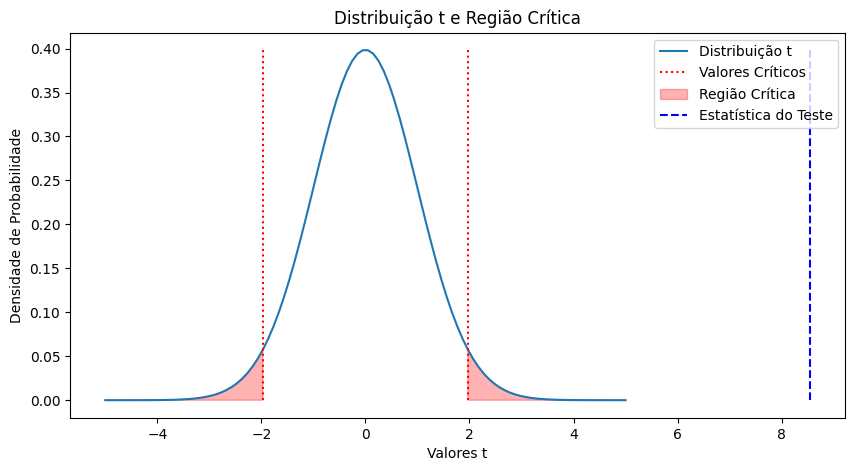

A probabilidade para valores entre -inf e 8,54 é de 100,00%


In [12]:
# Parâmetros do gráfico
mu = 0
variance = 1
sigma = variance**0.5
df = teste_t[2]
alpha = 0.05

# Calcular os valores críticos para a região crítica
t_critical_low = st.t.ppf(alpha/2, df)
t_critical_high = st.t.ppf(1 - alpha/2, df)

# Valores da estatística do teste
t_stat = teste_t[0]
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = st.t.pdf(x, df)

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, y, label='Distribuição t')
ax.vlines(x=[t_critical_low, t_critical_high], ymin=0, ymax=max(y), colors='r', linestyles='dotted', label='Valores Críticos')
ax.fill_between(x, y, where=(x < t_critical_low) | (x > t_critical_high), color='red', alpha=0.3, label='Região Crítica')
ax.vlines(x=[t_stat], ymin=0, ymax=max(y), colors='b', linestyles='dashed', label='Estatística do Teste')

plt.title('Distribuição t e Região Crítica')
plt.xlabel('Valores t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()

plt.show()

# Calcular a probabilidade
low = -np.inf
high = t_stat
prob_area = st.t.cdf(high, df) - st.t.cdf(low, df)
print(f'A probabilidade para valores entre {low:.2f} e {high:.2f} é de {prob_area:.2%}'.replace('.',','))


## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [13]:

# Carregar a base de dados dos pinguins do seaborn
penguins = sns.load_dataset("penguins")

# Remover valores nulos
penguins = penguins.dropna(subset=['sex', 'body_mass_g'])

# Separar os dados por espécie
species = penguins['species'].unique()

# Definir nível de significância
alpha = 0.05

# Resultados para cada espécie
results = []

for specie in species:
    # Filtrar dados para a espécie atual
    species_data = penguins[penguins['species'] == specie]
    
    # Separar os dados entre machos e fêmeas
    male_pg = species_data[species_data['sex'] == 'Male']['body_mass_g']
    female_pg = species_data[species_data['sex'] == 'Female']['body_mass_g']
    
    # Realizar o teste T
    t_stat, p_value = st.ttest_ind(male_pg, female_pg)
    
    # Armazenar resultados
    results.append({
        'Espécie': specie,
        'Estatística T': t_stat,
        'Valor-p': p_value,
        'Rejeitar a hipótese nula': p_value < alpha
    })

# Converter resultados para DataFrame e exibir
results_df = pd.DataFrame(results)
results_df


,Espécie,Estatística T,Valor-p,Rejeitar a hipótese nula
0,Adelie,13.126286,2.220644e-26,True
1,Chinstrap,5.207734,2.043956e-06,True
2,Gentoo,14.721676,2.133688e-28,True


O resultado mostra que a hipótese nula foi rejeitada em todos os teste-t por espeécie, assim conclui-se que há uma diferença significativa entre os pesos dos pinguins machos e fêmeas em todas as especies
.